In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/titanic/train.csv')
test=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/titanic/test.csv')
submission=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/titanic/sample_submission.csv')

In [27]:
train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [28]:
len(train)

8693

In [29]:
train_null = train.dropna()
train_null

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [30]:
len(train_null)

6606

In [31]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [33]:
cols = list(train.columns)
cat_features = []
num_features = []

for col in cols[1:-2]:
    col_type = train[col].dtype
    cat_features.append(col) if col_type == object else num_features.append(col)

In [19]:
cat_features

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [20]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

<Axes: >

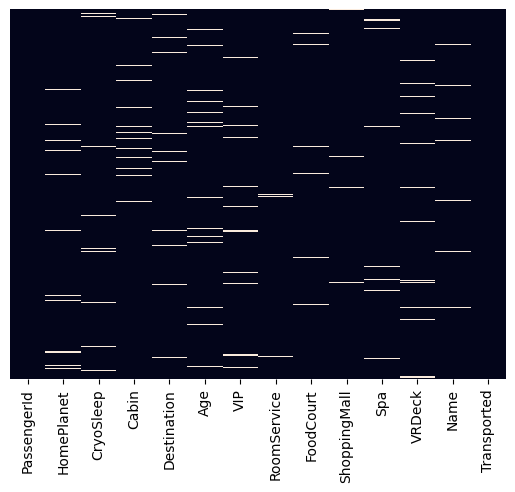

In [34]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [37]:
X_train=train.drop(['Transported'],axis=1)
X_train.values

array([['0001_01', 'Europa', False, ..., 0.0, 0.0, 'Maham Ofracculy'],
       ['0002_01', 'Earth', False, ..., 549.0, 44.0, 'Juanna Vines'],
       ['0003_01', 'Europa', False, ..., 6715.0, 49.0, 'Altark Susent'],
       ...,
       ['9279_01', 'Earth', False, ..., 1.0, 0.0, 'Fayey Connon'],
       ['9280_01', 'Europa', False, ..., 353.0, 3235.0,
        'Celeon Hontichre'],
       ['9280_02', 'Europa', False, ..., 0.0, 12.0, 'Propsh Hontichre']],
      dtype=object)

<Axes: >

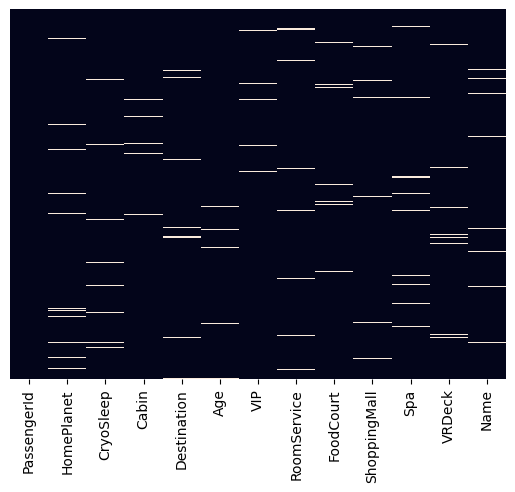

In [40]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False)

In [39]:
len(train)

8693

In [38]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [41]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [68]:
n=X_train.values

In [46]:
print('ok')


ok


In [47]:
X_train.values

array([['0001_01', 'Europa', False, ..., 0.0, 0.0, 'Maham Ofracculy'],
       ['0002_01', 'Earth', False, ..., 549.0, 44.0, 'Juanna Vines'],
       ['0003_01', 'Europa', False, ..., 6715.0, 49.0, 'Altark Susent'],
       ...,
       ['9279_01', 'Earth', False, ..., 1.0, 0.0, 'Fayey Connon'],
       ['9280_01', 'Europa', False, ..., 353.0, 3235.0,
        'Celeon Hontichre'],
       ['9280_02', 'Europa', False, ..., 0.0, 12.0, 'Propsh Hontichre']],
      dtype=object)

In [67]:
y_train=train['Transported'].astype('int')
m=y_train.values
m

array([0, 1, 0, ..., 1, 0, 1])

In [59]:
for cat_col in cat_features:
    train[cat_col]=train[cat_col].fillna(train[cat_col].mode()[0])
    print(cat_col,train[cat_col].isnull().sum())
for num_col in num_features:
    train[num_col] = train[num_col].fillna(train[num_col].mean())       
    print(num_col,train[num_col].isnull().sum())

HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


In [69]:
#sns.heatmap(train.isnull(), yticklabels=False,cbar=False)
train=train.drop(['Name'],axis=1)
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

KeyError: "['Name'] not found in axis"

In [120]:
y_pred2=y_pred.astype(bool)
y_pred2

array([ True,  True,  True, ...,  True,  True,  True])

In [110]:
#submission_file=common['Transported']
#data_new1['x1'] = data_new1['x1'].astype(bool) =y_pred.astype(bool)
#data_new1['x1'] = data_new1['x1'].astype(bool) 
df = pd.DataFrame(y_pred)


In [31]:
len(submission)

4277

In [28]:
test.isnull().PassengerId

0       False
1       False
2       False
3       False
4       False
        ...  
4270    False
4271    False
4272    False
4273    False
4276    False
Name: PassengerId, Length: 3740, dtype: bool

In [53]:
from array import *
d=test[['PassengerId']].to_numpy()

In [67]:
len(d)

3740

In [50]:
s=submission[['PassengerId']].to_numpy()

In [68]:
len(s)

4277

In [66]:
pd.concat([test[['PassengerId']],submission[['PassengerId']]]).drop_duplicates(keep=False)

,PassengerId
6,0029_01
11,0040_01
15,0046_02
21,0049_01
38,0094_01
...,...
4248,9223_01
4251,9229_01
4255,9238_02
4274,9271_01


In [69]:
common = test.merge(submission, on=['PassengerId'])
    

In [70]:
common

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,False
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,False
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,False
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,False
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...
3735,9265_01,43.0,47.0,0.0,3851.0,0.0,0.0,False
3736,9266_01,40.0,0.0,865.0,0.0,3.0,0.0,False
3737,9266_02,34.0,0.0,0.0,0.0,0.0,0.0,False
3738,9269_01,42.0,0.0,847.0,17.0,10.0,144.0,False


In [73]:
submission_file=common['Transported']

In [77]:
submission_file

0       False
1       False
2       False
3       False
4       False
        ...  
3735    False
3736    False
3737    False
3738    False
3739    False
Name: Transported, Length: 3740, dtype: bool

In [112]:
s=submission_file.to_numpy()

In [113]:
s

array([False, False, False, ..., False, False, False])

In [114]:
from sklearn.metrics import accuracy_score


In [118]:
accuracy_score(s,y_pred2)

0.0